# Diabetes prediction using machine learning

This notebook looks into using various Python-based machine learning and data science libraries to build a machine learning model capable of predicting whether or not someone has diabetes based on their medical attributes.

| <img src="images.jpg" width=600/> | 
|:--:| 
| Diabetes mellitus is a metabolic disease that causes high blood sugar. |

###  Problem definition
In our case, the problem we will be exploring is **binary classification** (predicting one of two classes).

> Given clinical parameters about a patient, can we predict whether or not they have diabetes?


### Features

Features are the diffrent parts of the dataset.

#### Diabetes Prediction Data Dictionary

1. Age:
  * Description: The age of an individual.
  * Data type: Numeric (integer)

2. Gender:
  * Description: The gender of an individual.
* Data type: Categorical (string)

3. Body Mass Index (BMI):
* Description: A measure of body fat based on height and weight.
* Data type: Numeric (float)

4. Hypertension:
* Description: Indicates whether an individual has hypertension (high blood pressure) or not.
* Data type: Categorical (0=No, 1=Yes)

5. Heart Disease:
* Description: Indicates whether an individual has a history of heart disease.
* Data type: Categorical (0=No, 1=Yes)

6. Smoking History
* Description: Indicates the smoking history of an individual.
* Data type: Categorical (string)

7. HbA1c Level:
* Description: The measurement of glycated hemoglobin in the blood, used to assess long-term blood glucose control.
* Data type: Numeric (float).

8. Blood Glucose Level:
* Description: The concentration of glucose in the blood (measured in mg/dL).
* Data type: Numeric (float).

9. Diabetes (Target Variable):
* Description: Indicates whether an individual has diabetes or not (the target variable to be predicted).
* Data type: Categorical (0=No, 1=Yes).

Note: The target variable "Diabetes" represents the outcome or dependent variable that we want to predict or classify based on the given features.


## 1. Preparing the tools

In [1]:
# Regular exploratory data analysis(EDA) libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(color_codes=True)

# Feature Encoding (Turn the categories into numbers)
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Filter and ignore future warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Load dataset

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

df.shape  #(rows & columns)

(100000, 9)

## 3. Exploratory Data Analysis (EDA)

The goal here is to find out more about the data by trying to answer the following questions through exploration;

* What kind of data do we have and how do we treat different types?
* What's missing from the data and how do we deal with it?
* Where are the outliers and how we deal with them?
* Which features can we add, change or remove to improve our data?

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Check for missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
# Statiscal summary of dataset
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.smoking_history.value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [8]:
# Let's find out how many each class are in our labels
df["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

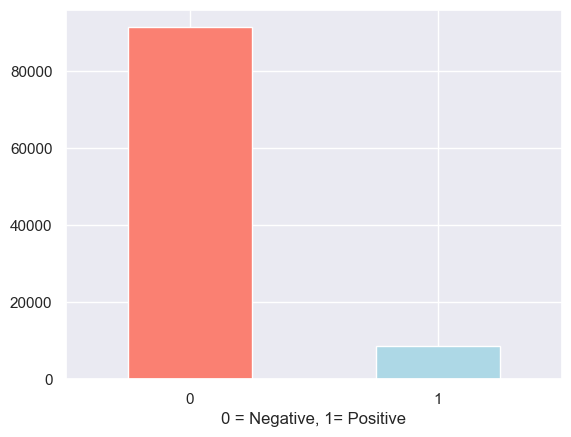

In [9]:
df["diabetes"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xlabel("0 = Negative, 1= Positive")
plt.xticks(rotation=0);

### 3.1 Diabetes Frequency by Gender

In [10]:
df.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [11]:
# compare target(diabetes) column with gender
pd.crosstab(df.diabetes, df.gender)

gender,Female,Male,Other
diabetes,,,
0,54091,37391,18
1,4461,4039,0


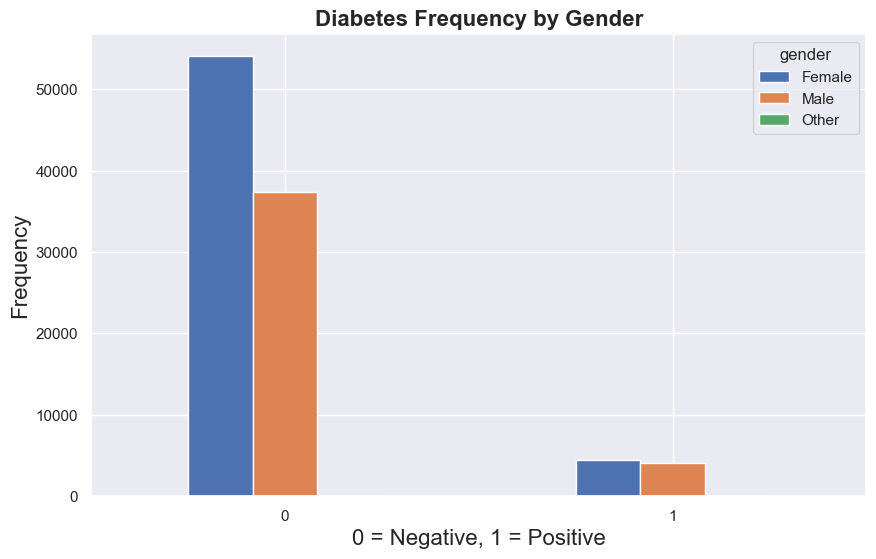

In [12]:
# Craete a plot of the crosstab
pd.crosstab(df.diabetes, df.gender).plot(kind="bar",
                                         figsize=(10, 6))

plt.title("Diabetes Frequency by Gender", weight="bold", fontsize=16)
plt.xlabel("0 = Negative, 1 = Positive", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xticks(rotation=0);

### 3.2 Diabetes and Blood_Glucose_Level

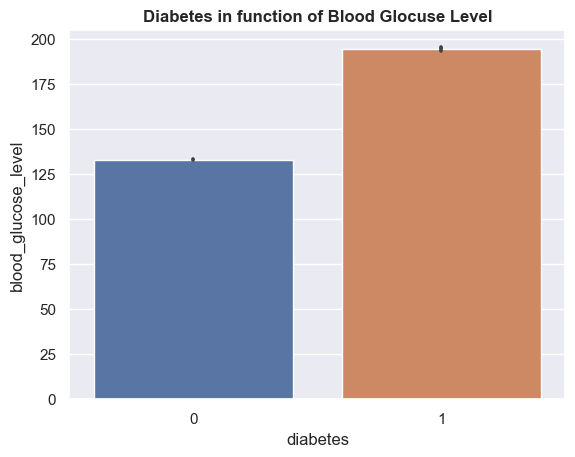

In [13]:
sns.barplot(x="diabetes", y="blood_glucose_level", data=df)
plt.title("Diabetes in function of Blood Glocuse Level", weight="bold");

### 3.3 age distribution of the dataset

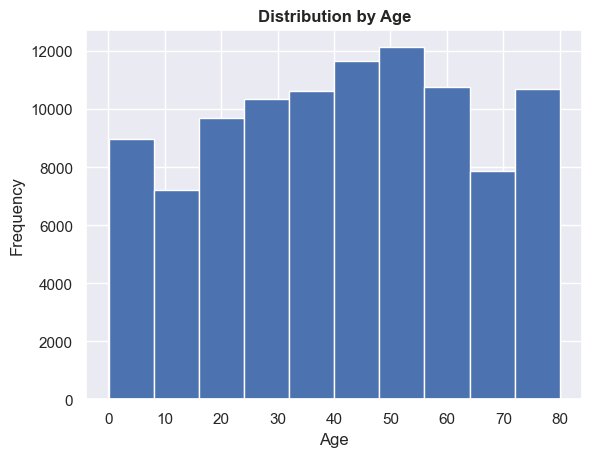

In [14]:
# Visualize the age distribution of the dataset
df.age.plot.hist()
plt.title("Distribution by Age", weight="bold")
plt.xlabel("Age");

## 4. Feature Encoding of categorical data
Categorical data is non-numeric and often can be characterized into categories or groups.
We encode categorical data numerically because math is generally done using numbers. A big part of natural language processing is converting text to numbers. Just like that, our algorithms cannot run and process data if that data is not numerical. 

In [15]:
# Transform categorical features into numerical features
le = LabelEncoder()
label_encoded_df = df.copy()
for col in label_encoded_df.select_dtypes(include='O').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])

In [16]:
label_encoded_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [17]:
# Make a correlation matrix of the dataset
label_encoded_df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


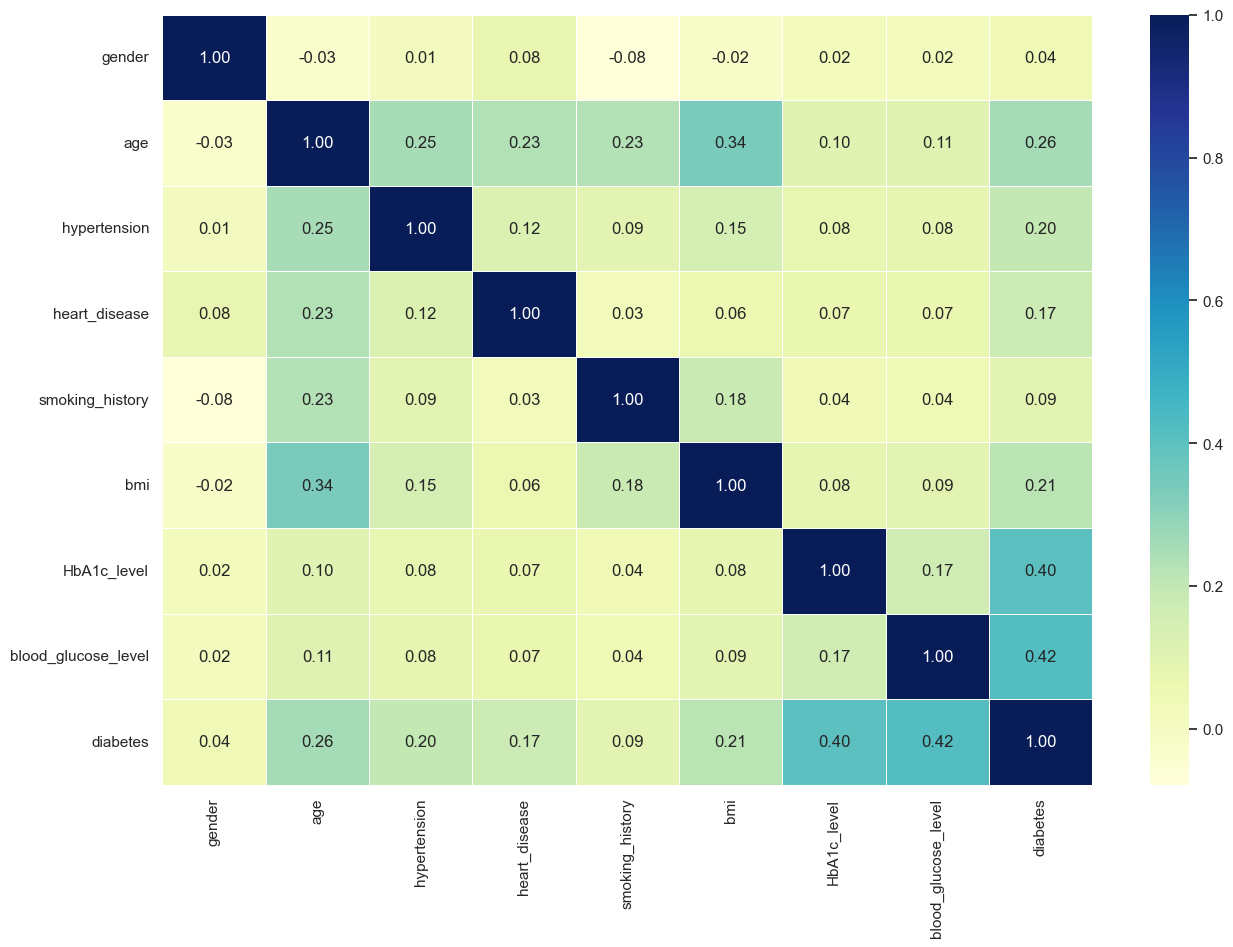

In [18]:
# Let's visualize the correlation matrix
corr_matrix = label_encoded_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## 5. Modelling & Experimentaion

In [19]:
# Split data into X and y
X = label_encoded_df.drop("diabetes", axis=1)

y= label_encoded_df["diabetes"]

In [20]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we've got our data splitted into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [21]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [22]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.9495, 'KNN': 0.95245, 'Random Forest': 0.97065}

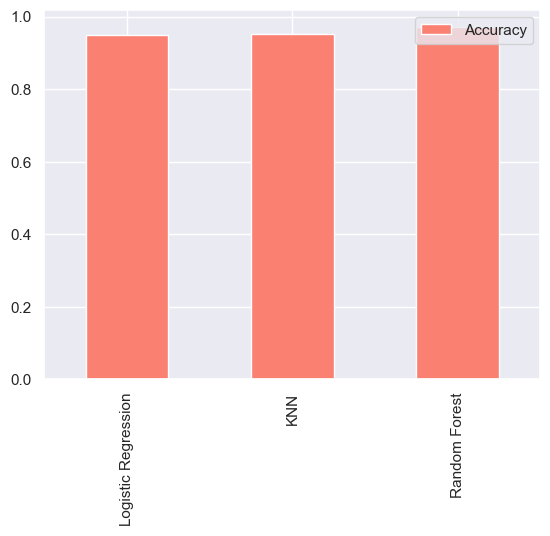

In [23]:
# Model Comparison
compare_model = pd.DataFrame(model_scores, index=["Accuracy"])
compare_model.T.plot(kind="bar",
                     color="salmon");

### 5.1 Hyperparamter Tuning with GridSearchCV

Since the `RandomForestClassifier` model provides the best scores so far, we'll focus on improving it using GridSearchCV...

In [24]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":[100, 200, 500],
           "max_depth": [None],
           "min_samples_split": [6],
           "min_samples_leaf":[1, 2]}

In [25]:
# Setup random seed
np.random.seed(42)

# Setup grid hyperparameter search for RandomForestClassifier
clf = GridSearchCV(RandomForestClassifier(), 
                           param_grid=rf_grid,
                           cv=5,
                           verbose=2)

# Fit grid hyperparameter search model for RandomForestClassifier()
clf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  12.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  10.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  12.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  12.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=  11.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=  21.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=  22.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=  21.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=  21.1s
[CV] END max_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [26]:
clf.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

### 5.2 Evaluting our tuned machine learning classifier

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Cross validation

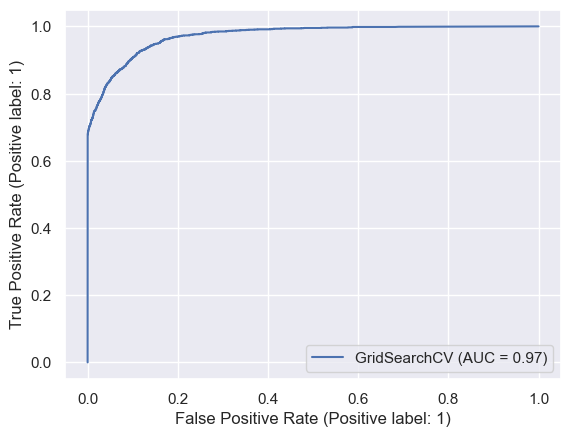

In [27]:
# Plot ROC curve and calculate AUC score
RocCurveDisplay.from_estimator(clf, X_test, y_test);

**Confusion Matrix**

A confusion matrix is a quick way to compare the label a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [28]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

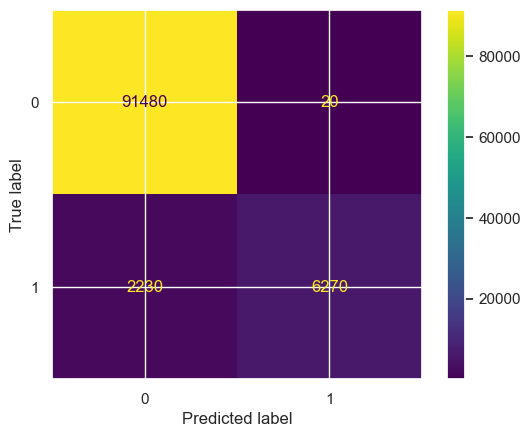

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

# Using the .from_estimator
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

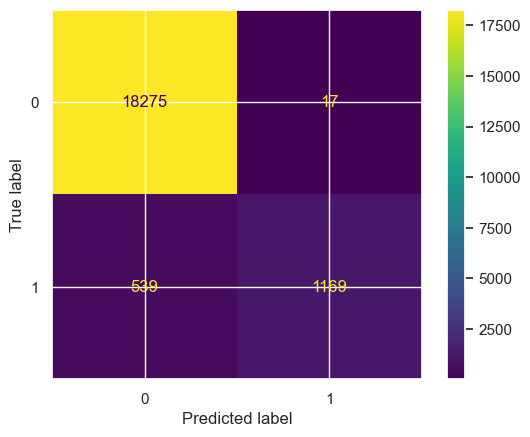

In [30]:
# Using the from_predictions
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

In [31]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



### 5.3  Feature importance based on mean decrease in impurity (MDI)

Feature importance is a key concept in machine learning that refers to the relative importance of each feature in the training data. In other words, it tells us which features are most predictive of the target variable.

In [32]:
# Instantiate RandomForestClassifier to compute the feature importances
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
# Compute the feature importance based on MDI
import time

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.056 seconds


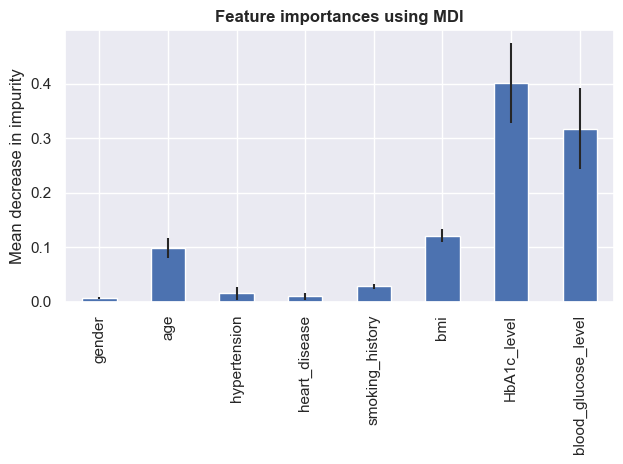

In [34]:
# Plot the impurities based on importance
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI", weight="bold")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 6. Saving the Random Forest Classifier (model) for future predictions

In [35]:
from joblib import dump, load

# Save model to file
dump(clf, filename="random_forest_classifier_1.joblib")

['random_forest_classifier_1.joblib']

In [36]:
# Load/import the saved joblib model
loaded_model = load(filename="random_forest_classifier_1.joblib")

score = loaded_model.score(X_test, y_test)
print(f"Accuracy: {score*100:.2f}%")

Accuracy: 97.22%
